In [18]:
import numpy as np
import pandas as pd

In [19]:
dataset = pd.read_csv("German Credit Data.csv")

In [20]:
dataset.head(10)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
5,A14,36,A32,9055,A65,A73,2,A93,4,35,A143,1,A172,0
6,A14,24,A32,2835,A63,A75,3,A93,4,53,A143,1,A173,0
7,A12,36,A32,6948,A61,A73,2,A93,2,35,A143,1,A174,0
8,A14,12,A32,3059,A64,A74,2,A91,4,61,A143,1,A172,0
9,A12,30,A34,5234,A61,A71,4,A94,2,28,A143,2,A174,1


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [22]:
dataset.shape

(1000, 14)

In [23]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
inst_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residing_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
num_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
status,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


In [24]:
dataset.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [25]:
X_features = list(dataset.columns)
Y = dataset.status.values

In [26]:
X_features.remove("status")

In [27]:
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [28]:
encoded_X_features = pd.get_dummies(dataset[X_features], drop_first=True
                                   )

In [29]:
encoded_X_features

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(encoded_X_features, Y, random_state=0, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logReg = LogisticRegression(max_iter=1000)

In [34]:
logREg_model = logReg.fit(X_train, Y_train)

In [35]:
y_pred = logREg_model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.82       142
           1       0.57      0.50      0.53        58

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.74      0.74      0.74       200



In [57]:
cm = confusion_matrix(Y_test, y_pred)

In [58]:
cm

array([[120,  22],
       [ 29,  29]], dtype=int64)

In [52]:
import seaborn as sns

<AxesSubplot:>

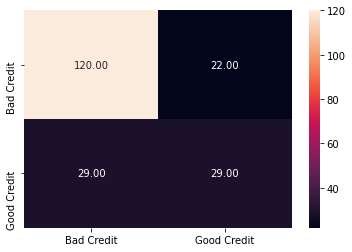

In [59]:
sns.heatmap(cm, annot=True, fmt='0.2f', xticklabels=["Bad Credit", "Good Credit"], 
            yticklabels=["Bad Credit", "Good Credit"])